# Exploratory Data Analysis

This notebook covers the following steps:

1) Reading the data

2) Variable Identification

3) Hypothesis Generation

4) Univariate Analysis

5) Bivariate Analysis

6) Missing Values

7) Outlier Treatment

In [1]:
#importing required libraries

import pandas as pd
import numpy as np
import os

# Visualisation
import seaborn as sns
sns.set(color_codes = True)
sns.set_style("whitegrid")
import matplotlib.pyplot as plt
%matplotlib inline  

### 1) Reading the data

In [2]:
df = pd.read_csv("Fn-UseC_-Marketing-Customer-Value-Analysis.csv")

In [10]:
df.shape

(9134, 24)

### 2) Variable Identification

In [11]:
df.dtypes

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

In [9]:
df.head(5)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


We have 16 categorical variables and 8 numeric variables.
###### Our dependent variable is Customer Lifetime Value, the rest are the independent variables

### 3) Hypothesis Generation

We hypothesize about the nature of relationships we expect from the data:

a) Customer variable will not help in analysis. The role of Effective To Date variable seems unclear as we do not have an idea of when this data was captured. We do not have an explanation of what the Response variable means. So we will not include these 3 variables in our analysis.

b) Employed persons should have higher CLV compared to those unemployed

c) Higher income should correspond with higher CLV. Those customers who opted for Premium or higher-grade coverage could also show greater CLV

d) Monthly Premium Auto should be positively related to CLV, greater the value of installments, higher the CLV

d) Months Since Policy Inception indicates the duration of insurance coverage. Naturally, longer the association with the company, greater is the contribution of the customer to CLV. 

e) The Number of Policies should also have a positive relationship with CLV

Since we do not have information about the terms of the policies or offer types of the company, we cannot hypothesize about their effect.

### 4) Univariate Analysis

We shall now analyse the variables one by one

###### Customer Lifetime Value

In [15]:
# descriptive statistics
df['Customer Lifetime Value'].describe()

count     9134.000000
mean      8004.940475
std       6870.967608
min       1898.007675
25%       3994.251794
50%       5780.182197
75%       8962.167041
max      83325.381190
Name: Customer Lifetime Value, dtype: float64

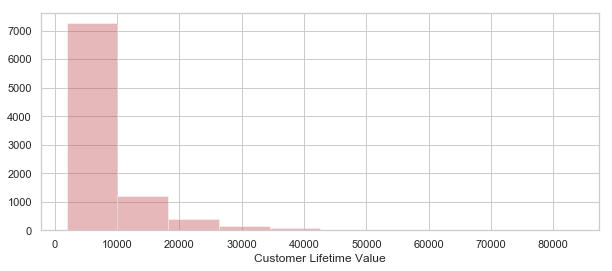

In [100]:
# observe distribution
dims = (10, 4)
fig, ax = plt.subplots(figsize=dims)
sns.distplot(df['Customer Lifetime Value'], kde = False, bins = 10, color = 'r')

From the difference between mean and median, we can infer that there are outliers in our data. This is again confirmed by the plot above, where we can see that a few extreme values are affecting the distribution of this variable.

###### State

In [35]:
# count%
df['State'].value_counts()/len(df['State'])                        

California    0.344865
Oregon        0.284760
Arizona       0.186446
Nevada        0.096562
Washington    0.087366
Name: State, dtype: float64

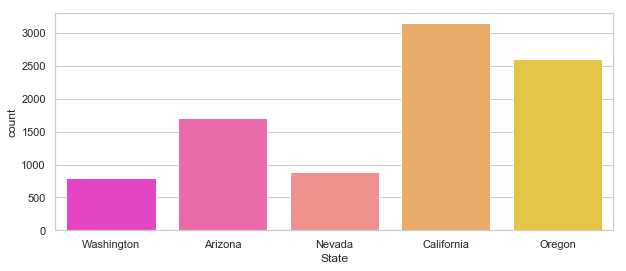

In [135]:
# Visualization
dims = (10, 4)
fig, ax = plt.subplots(figsize=dims)
sns.countplot(x=df['State'], palette = "spring")

We observe the distribution of customers across five states. Most of the customers are concentrated in California (34.5%), followed by Oregon (28.5%), Arizona (18.6%). Nevada (9.6%) and Washington (8.7%) roughly account for the same number of customers.

###### Coverage

In [37]:
# count%
df['Coverage'].value_counts()/len(df['Coverage'])

Basic       0.609591
Extended    0.300197
Premium     0.090212
Name: Coverage, dtype: float64

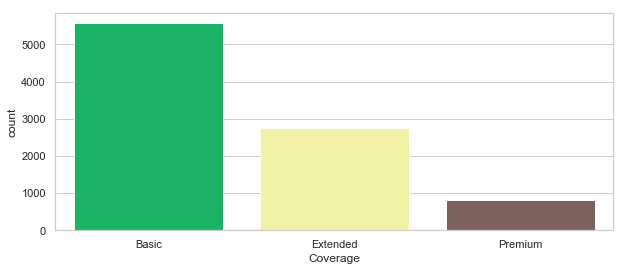

In [139]:
# visualisation
dims = (10, 4)
fig, ax = plt.subplots(figsize=dims)
sns.countplot(df['Coverage'], palette = "terrain")

Roughly 61% of customers have Basic insurance coverage. 30% have Extended coverage and Premium coverage is opted for by only 9% of customers.

###### Education

In [57]:
# count%
df['Education'].value_counts()/len(df['Education'])

Bachelor                0.300854
College                 0.293519
High School or Below    0.287059
Master                  0.081125
Doctor                  0.037443
Name: Education, dtype: float64

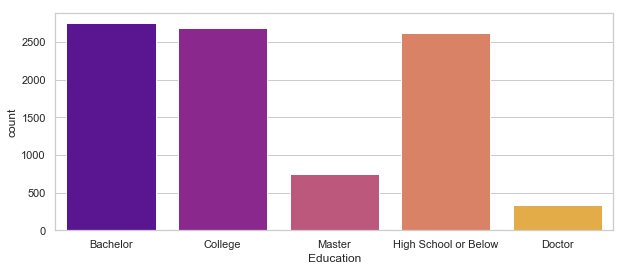

In [86]:
# visualisation
dims = (10, 4)
fig, ax = plt.subplots(figsize=dims)
sns.countplot(df['Education'],palette = "plasma")

Out of our customers, roughly 30% have attained Bachelor's education, another 30% (approx.) have College education. This is followed by 28.7% having finished High School or below. Those customers with Master's or Doctorate constitute smaller proportions, 8.1% and 3.7% respectively.

###### Employment Status

In [72]:
#count%
df['EmploymentStatus'].value_counts()/len(df['EmploymentStatus'])

Employed         0.623823
Unemployed       0.253668
Medical Leave    0.047296
Disabled         0.044340
Retired          0.030874
Name: EmploymentStatus, dtype: float64

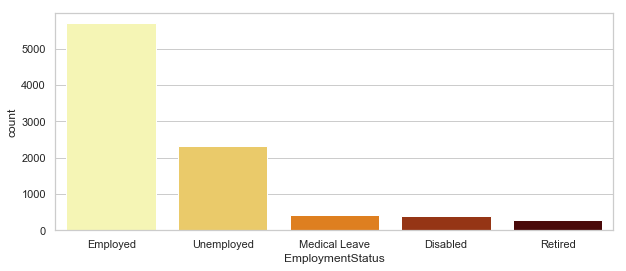

In [143]:
#visualisation
dims = (10, 4)
fig, ax = plt.subplots(figsize=dims)
sns.countplot(df['EmploymentStatus'],palette = "afmhot_r")

A majority of 62.4% customers are employed. Unemployed constitute 25.4%. The other categories of Medical Leave, Disabled, Retired constitute very low proportions of 4% or lesser.

###### Gender

In [76]:
#count%
df['Gender'].value_counts()/len(df['Gender'])

F    0.509963
M    0.490037
Name: Gender, dtype: float64

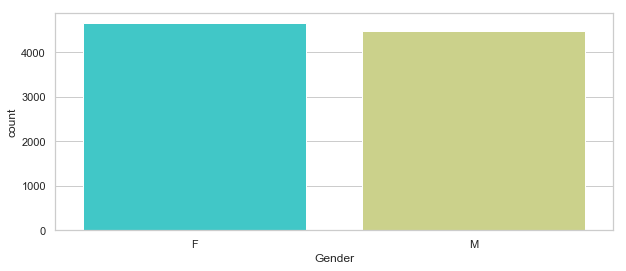

In [142]:
#visualisation
dims = (10, 4)
fig, ax = plt.subplots(figsize=dims)
sns.countplot(df['Gender'], palette = "rainbow")

Roughly 51% of customers are female as opposed to 49% of males. There is not much difference in the proportion so this variable is well-balanced. It will be interesting to see how this corresponds with CLV.

###### Income

In [80]:
# descriptive statistics
df['Income'].describe()

count     9134.000000
mean     37657.380009
std      30379.904734
min          0.000000
25%          0.000000
50%      33889.500000
75%      62320.000000
max      99981.000000
Name: Income, dtype: float64

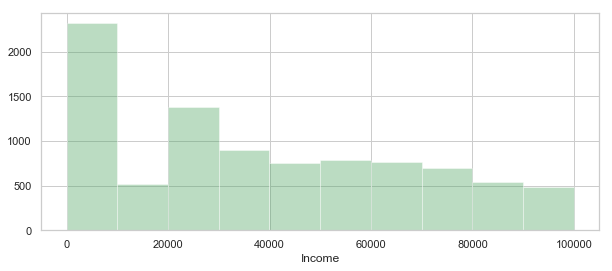

In [94]:
# visualise distribution
dims = (10, 4)
fig, ax = plt.subplots(figsize=dims)
sns.distplot(df['Income'], color = 'g', kde = False, bins =10)

We see a notable difference between the mean and the median which may indicate few outliers. We see a high concentration of values in the lower classes. This needs to be investigated further. We will revisit this while checking for outliers and missing values.

##### Location Code

In [19]:
# count%
df['Location Code'].value_counts()/len(df['Location Code'])

Suburban    0.632691
Rural       0.194110
Urban       0.173199
Name: Location Code, dtype: float64

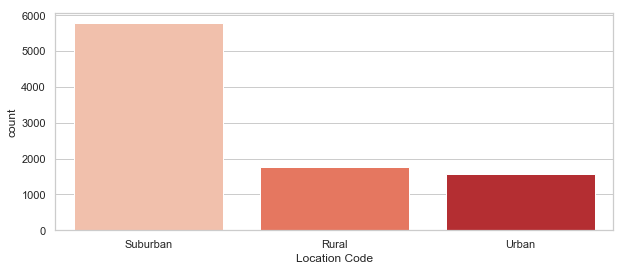

In [93]:
# visualisation
dims = (10, 4)
fig, ax = plt.subplots(figsize=dims)
sns.countplot(df['Location Code'], palette = "Reds")

63.3% of customers belong to the Suburban category, while 19.4% and 17.3% belong to Rural and Urban category respectively.

###### Marital Status

In [21]:
# count%
df['Marital Status'].value_counts()/len(df['Marital Status'])

Married     0.580031
Single      0.270090
Divorced    0.149880
Name: Marital Status, dtype: float64

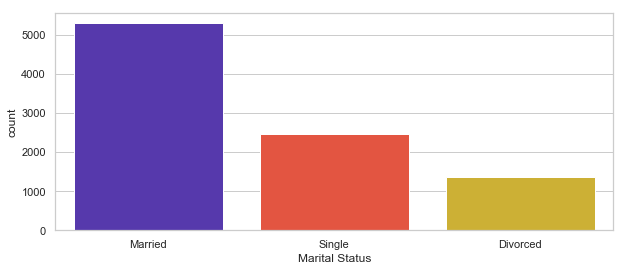

In [129]:
# visualisation
dims = (10, 4)
fig, ax = plt.subplots(figsize=dims)
sns.countplot(df['Marital Status'], palette = "CMRmap")

58% of respondents are Married, 27% are Single and about 15% are Divorced.

###### Monthly Premium Auto

In [29]:
# descriptive statistics
df['Monthly Premium Auto'].describe()

count    9134.000000
mean       93.219291
std        34.407967
min        61.000000
25%        68.000000
50%        83.000000
75%       109.000000
max       298.000000
Name: Monthly Premium Auto, dtype: float64

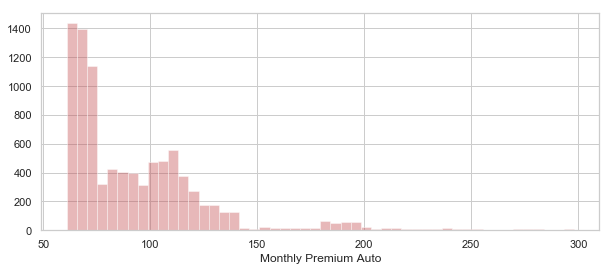

In [91]:
# visualising distribution
dims = (10, 4)
fig, ax = plt.subplots(figsize=dims)
sns.distplot(df['Monthly Premium Auto'], kde = False, color = 'r')

Mean and median show some difference. The distribution seems to be right-skewed.

###### Months Since Last Claim

In [32]:
# descriptive statistics
df['Months Since Last Claim'].describe()

count    9134.000000
mean       15.097000
std        10.073257
min         0.000000
25%         6.000000
50%        14.000000
75%        23.000000
max        35.000000
Name: Months Since Last Claim, dtype: float64

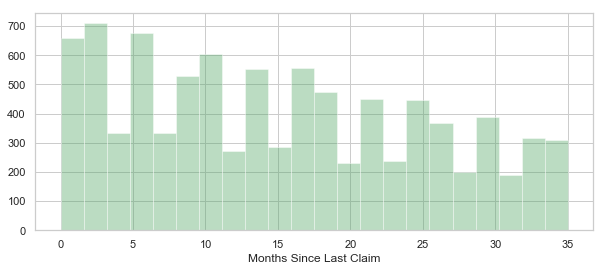

In [90]:
# visualising distribution
dims = (10, 4)
fig, ax = plt.subplots(figsize=dims)
sns.distplot(df['Months Since Last Claim'],kde = False, color = 'g')

Difference between mean and median is negligible which means lesser/no incidence of outliers.

###### Months Since Policy Inception

In [7]:
# descriptive statistics
df['Months Since Policy Inception'].describe()

count    9134.000000
mean       48.064594
std        27.905991
min         0.000000
25%        24.000000
50%        48.000000
75%        71.000000
max        99.000000
Name: Months Since Policy Inception, dtype: float64

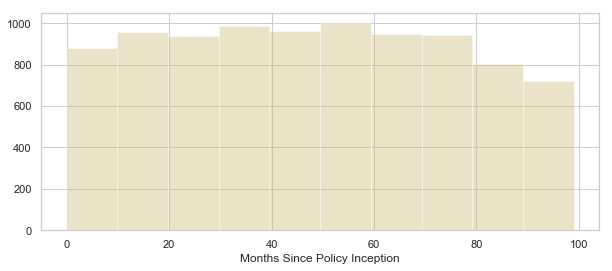

In [89]:
# visualise distribution
dims = (10, 4)
fig, ax = plt.subplots(figsize=dims)
sns.distplot(df['Months Since Policy Inception'], kde = False, bins = 10, color = 'y')

There is not much difference between the mean and median for this variable, so we may not encounter outliers here. The dsitribution seems to be consistent across values from 0 to 100.

###### Number of Open Complaints

In [14]:
# descriptive statistics
df['Number of Open Complaints'].describe()

count    9134.000000
mean        0.384388
std         0.910384
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         5.000000
Name: Number of Open Complaints, dtype: float64

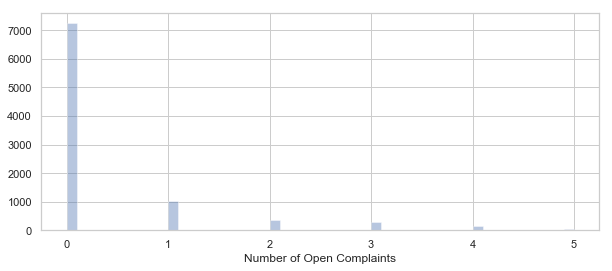

In [88]:
# visualising distribution
dims = (10, 4)
fig, ax = plt.subplots(figsize=dims)
sns.distplot(df['Number of Open Complaints'], kde = False, color = 'b')

The gap between mean and median is explained when we visualise the variable values. We see that significant majority of the customers do not have any open complaints, followed by those customers who have 1 complaint.

###### Number of Policies

In [38]:
# descriptive statistics
df['Number of Policies'].describe()

count    9134.000000
mean        2.966170
std         2.390182
min         1.000000
25%         1.000000
50%         2.000000
75%         4.000000
max         9.000000
Name: Number of Policies, dtype: float64

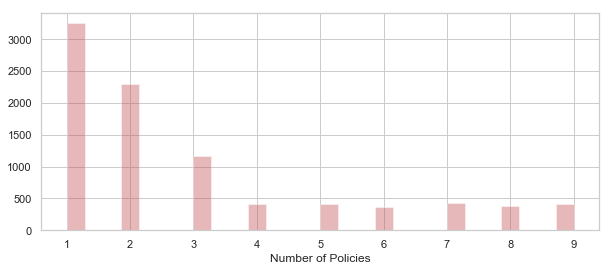

In [87]:
# visualisation
dims = (10, 4)
fig, ax = plt.subplots(figsize=dims)
sns.distplot(df['Number of Policies'], kde = False, color = 'r')

There doesn't seem to be any outliers for this variable. Most of the customers seem to have one insurance policy, followed by those who have two.

###### Policy Type

In [41]:
# count%
df['Policy Type'].value_counts()/len(df['Policy Type'])

Personal Auto     0.743157
Corporate Auto    0.215459
Special Auto      0.041384
Name: Policy Type, dtype: float64

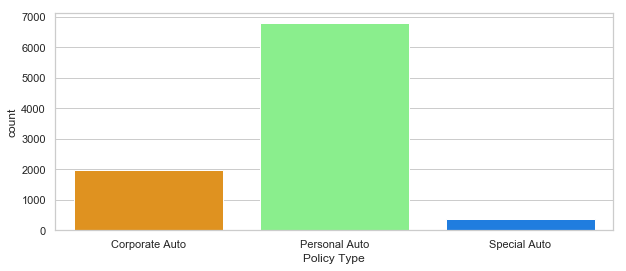

In [127]:
# visualisation
dims = (10, 4)
fig, ax = plt.subplots(figsize=dims)
sns.countplot(df['Policy Type'], palette = "jet_r")

A majority of 74.3% of customers have Personal Auto insurance while 21.5% have Corporate Auto insurance, followed by 4.1% of customers opting for Special Auto insurance.

###### Policy

In [46]:
# count%
df['Policy'].value_counts()/len(df['Policy'])

Personal L3     0.375082
Personal L2     0.232319
Personal L1     0.135757
Corporate L3    0.111014
Corporate L2    0.065141
Corporate L1    0.039304
Special L2      0.017955
Special L3      0.016203
Special L1      0.007226
Name: Policy, dtype: float64

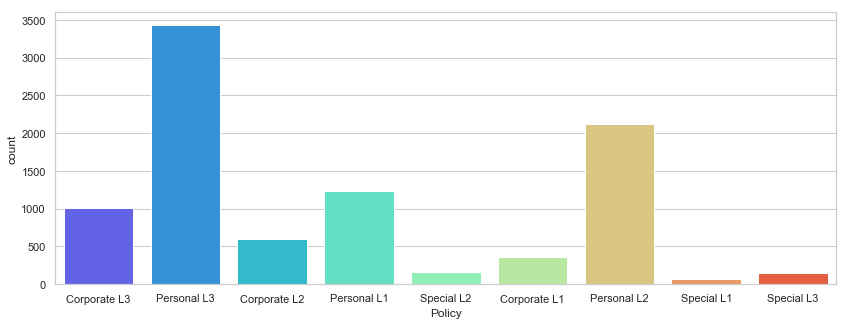

In [111]:
# visualisation
dims = (14, 5)
fig, ax = plt.subplots(figsize=dims)
sns.countplot(df['Policy'], palette = "rainbow", ax=ax)

Personal L3 has been opted by 37.5% of the customers, followed by Personal L2 and Personal L1. This variable might be related to the Policy Type variable observed earlier. If they are related so, it would be a good practice not to include them simultaneously in a model. We'll analyse this in the bivariate analysis.

###### Renew Offer Type

In [55]:
# descriptive statistics
df['Renew Offer Type'].value_counts()/len(df['Renew Offer Type'])

Offer1    0.410773
Offer2    0.320342
Offer3    0.156777
Offer4    0.112109
Name: Renew Offer Type, dtype: float64

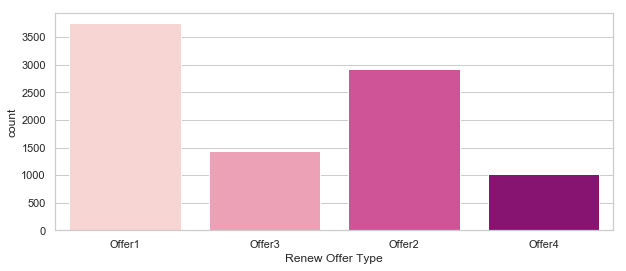

In [85]:
# visualisation
dims = (10, 4)
fig, ax = plt.subplots(figsize=dims)
sns.countplot(df['Renew Offer Type'], palette = "RdPu")

Offer1 has been taken by 41% of customers, followed by 32% of customers opting for Offer2. Offers 3 and 4 have been taken by 15.7% and 11.2% of customers respectively.

###### Sales Channel

In [57]:
# count%
df['Sales Channel'].value_counts()/len(df['Sales Channel'])

Agent          0.380666
Branch         0.281038
Call Center    0.193234
Web            0.145062
Name: Sales Channel, dtype: float64

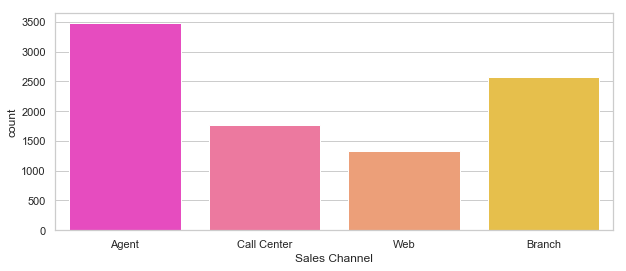

In [88]:
# visualisation
dims = (10, 4)
fig, ax = plt.subplots(figsize=dims)
sns.countplot(df['Sales Channel'], palette = "spring")

38% of customers are approached through Agents, 28.1% through Branch, 19.3% through Call Center and 14.5% through the Web.

###### Total Claim Amount

In [63]:
# descriptive statistics
df['Total Claim Amount'].describe()

count    9134.000000
mean      434.088794
std       290.500092
min         0.099007
25%       272.258244
50%       383.945434
75%       547.514839
max      2893.239678
Name: Total Claim Amount, dtype: float64

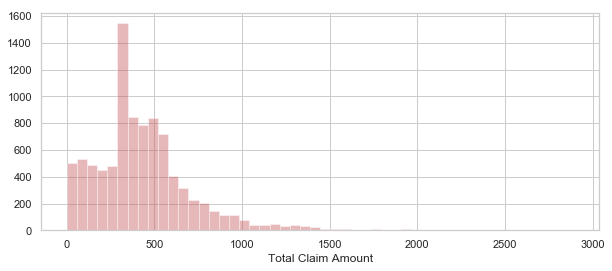

In [83]:
# visualising distribution
dims = (10, 4)
fig, ax = plt.subplots(figsize=dims)
sns.distplot(df['Total Claim Amount'], kde = False, color = 'r')

There is some difference between mean and median. The distribution also looks skewed.

###### Vehicle Class

In [71]:
# count%
df['Vehicle Class'].value_counts()/len(df['Vehicle Class'])

Four-Door Car    0.505912
Two-Door Car     0.206481
SUV              0.196628
Sports Car       0.052989
Luxury SUV       0.020145
Luxury Car       0.017845
Name: Vehicle Class, dtype: float64

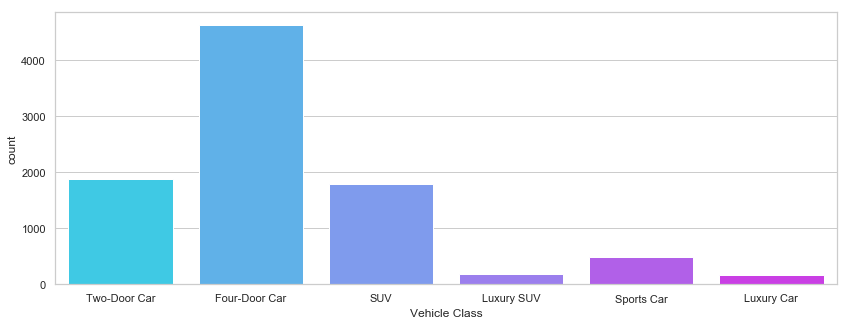

In [147]:
# visualisation
dims = (14, 5)
fig, ax = plt.subplots(figsize=dims)
sns.countplot(df['Vehicle Class'],ax=ax, palette = "cool")

Four-Door Cars are insured by 50.6% of the customers, Two-Door Cars by 20.6%, SUV by 19.7% of customers. The rest of the vehicle types are insured by 5% or less of the customers.

###### Vehicle Size

In [77]:
# count%
df['Vehicle Size'].value_counts()/len(df['Vehicle Size'])

Medsize    0.703306
Small      0.193125
Large      0.103569
Name: Vehicle Size, dtype: float64

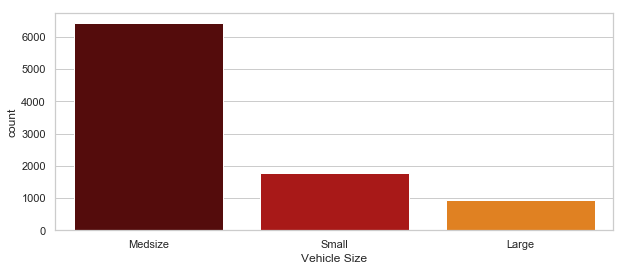

In [113]:
# visualisation
dims = (10, 4)
fig, ax = plt.subplots(figsize=dims)
sns.countplot(df['Vehicle Size'], palette = "gist_heat")

Medsize vehicles are opted for by 70.3% of customers, Small size by 19.3% and Large size by 10.3% of customers.

### 3) Bivariate Analysis

Now we will analyse variables against each other to uncover relationships.

We have 7 independent numeric variables. We will analyse their relationship with the dependent variable CLV, taking four variables at a time.

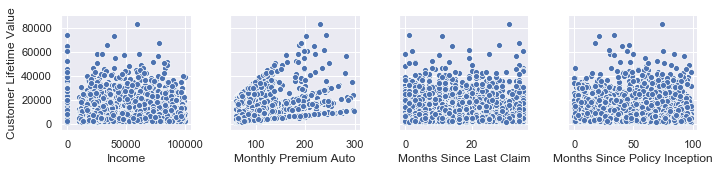

In [15]:
sns.set(color_codes = True)
sns.pairplot(df, x_vars = ["Income","Monthly Premium Auto", "Months Since Last Claim","Months Since Policy Inception"],
y_vars = ["Customer Lifetime Value"])

Out of the four variables, Monthly Premium auto seems to have a positive correlation with Customer Lifetime Value. Logically, this makes sense. Our initial hypothesis seems correct. From the correlation heatmap below, we see that this variable has a correlation value of 0.4 with CLV.

We initially hypothesized about a positive relation between CLV and Income, while this correlation is positive, the value is 0.024, which is very small.

Months Since Last Claim seems to have no definite relationship with CLV.

Contrary to another initial hypothesis, Months Since Policy Inception also does not have a strong postive relation with CLV. Correlation value here is 0.0094.

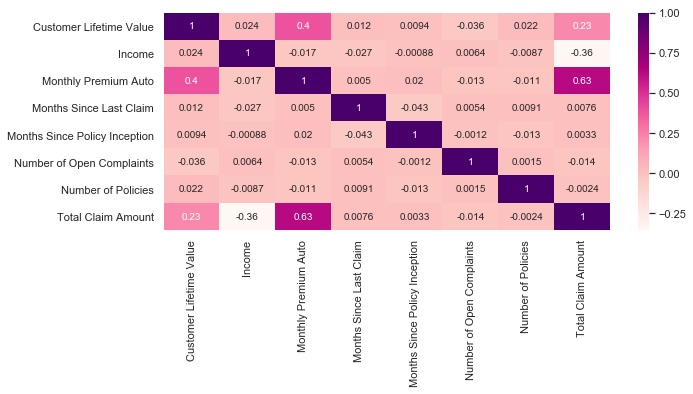

In [102]:
correlation1 = df.corr()
dims = (10, 4)
fig, ax = plt.subplots(figsize=dims)
sns.heatmap(correlation1,annot = True, ax = ax,cmap = "RdPu")

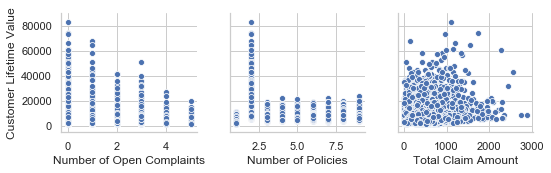

In [6]:
sns.pairplot(df, x_vars = ["Number of Open Complaints","Number of Policies","Total Claim Amount"],
y_vars = ["Customer Lifetime Value"])

Number of Open Complaints and Number of Policies are restricted to a few values as observed in the univariate analysis, which is why the graphs here look so. From the heatmap, we observe that the Number of Open Complaints has a negative correlation value of -0.036 and Number of Policies has a correlation value of 0.022.

Surprisingly, Total Claim Amount does not show a strong relationship with Customer Lifetime Value (0.23).

Now that we have checked the numeric variables against CLV, let us check the relation of the some numeric variables amonst themselves. We use the heatmap to guide us here.

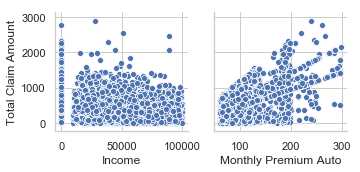

In [8]:
sns.pairplot(df, x_vars = ["Income", "Monthly Premium Auto"], y_vars = ["Total Claim Amount"])

Income has a weak negative correlation of -0.36 with Total Claim Amount. Monthly Premium Auto however has a correlation of 0.63 with Total Claim Amount. This makes sense considering that installments must be calculated based on the coverage plan and amount of insurance.

Now let us look at the categorical variables in relation to our dependent variable CLV, taking 2 at a time.

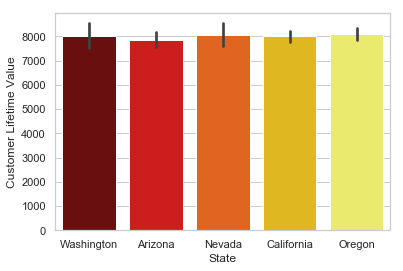

In [151]:
# State and CLV
sns.barplot(x="State",y="Customer Lifetime Value",data = df, palette = "hot")

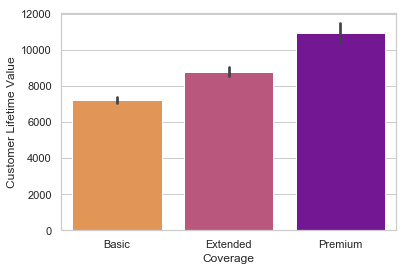

In [67]:
# Coverage and CLV
sns.barplot(x="Coverage",y="Customer Lifetime Value",data = df, palette= "plasma_r")

State-wise there seems to be no particular trend or relationship we can conclude. However, upon analysing it in light of our univariate analysis, the least number of customers were from Nevada and Washington, yet they contribute more or less the same as the other states to CLV.  

In case of coverage, as we had hypothesized, Premium coverage tends to contribute the most to CLV. This is interesting because most of our respondents opted for Basic Coverage.

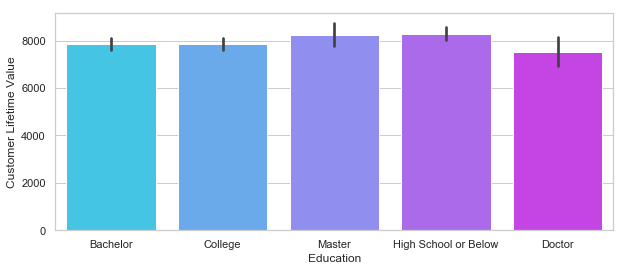

In [155]:
# Education and CLV
dims = (10, 4)
fig, ax = plt.subplots(figsize=dims)
sns.barplot(x="Education",y="Customer Lifetime Value",data = df, palette = "cool")

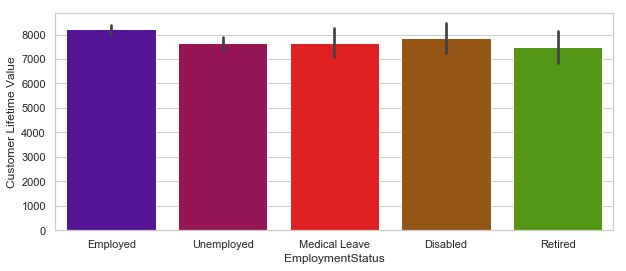

In [157]:
# Employment Status and CLV
dims = (10, 4)
fig, ax = plt.subplots(figsize=dims)
sns.barplot(x="EmploymentStatus",y="Customer Lifetime Value",data = df, palette= "brg")

From the plots, there doesn't seem to be a strong relationship with CLV. Our initial hypothesis of Employed customers is not supported here.

However, for Education, even though we had very few proportion of customers with Master or Doctor, they contribute roughly similar proportions to CLV.
Even in case of EmploymentStatus, the proportions of Medical Leave, Disabled, Retired customers were quite low, but here we again see that there is little difference with the those of Employed/Unemployed in their contribution to CLV.

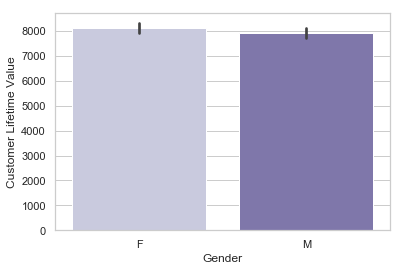

In [45]:
# Gender and CLV
sns.barplot(x="Gender",y="Customer Lifetime Value",data = df, palette = "Purples")

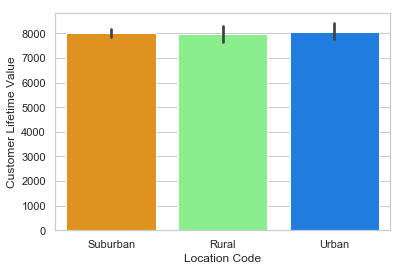

In [158]:
# Location Code and CLV
sns.barplot(x="Location Code",y="Customer Lifetime Value",data = df, palette = "jet_r")

Gender does not seem to have much effect on the Customer Lifetime Value. We even had equivalent proportions of both genders in our dataset.

We had a majority of Suburban customers in our dataset however CLV across all classes is the same.

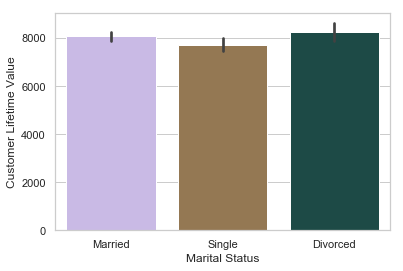

In [161]:
# Marital Status and CLV
sns.barplot(x="Marital Status",y="Customer Lifetime Value",data = df, palette="cubehelix_r")

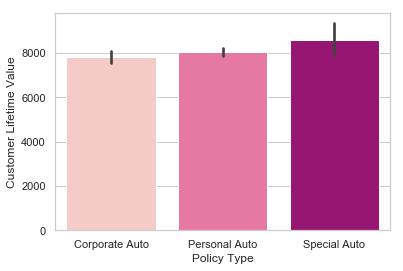

In [49]:
# Policy Type and CLV
sns.barplot(x="Policy Type",y="Customer Lifetime Value",data = df, palette ="RdPu")

From the plot, Marital Status does not seem to have a significant relationship with CLV. However in our dataset, majority of customers are Married.

In Policy Type, we had a majority of customers opting for Personal Auto. So it is interesting to note that Special Type has a slightly higher contribution to CLV and Corporate Auto comes quite close to Personal Auto despite its low proportion in the dataset.

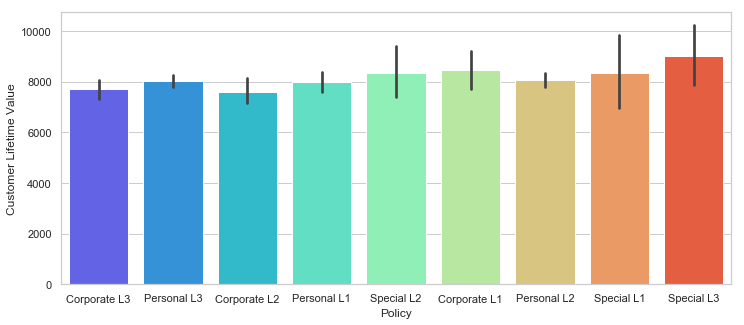

In [83]:
# Policy and CLV
dims = (12,5)
fig, ax = plt.subplots(figsize = dims)
sns.barplot(x="Policy",y="Customer Lifetime Value",data = df, palette = "rainbow")

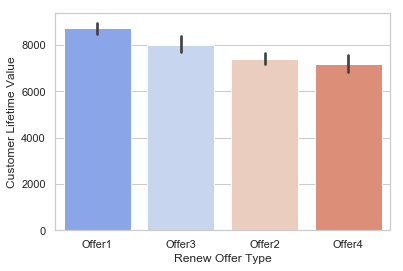

In [62]:
# Renew Offer Type and CLV
sns.barplot(x="Renew Offer Type",y="Customer Lifetime Value",data = df, palette = "coolwarm")

Most of the customers opted for PersonalL2, L3 followed by L1. Special L3 however, contributes the highest to CLV. This may be a significant variable.

In Renew Offer Type, majority of customers opted for Offer1 and Offer2. Here, Offer1 contributes the greatest, followed by Offer3, not Offer2.

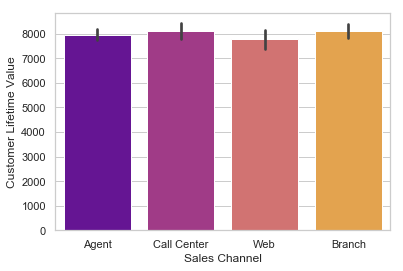

In [66]:
# Sales Channel and CLV
sns.barplot(x="Sales Channel",y="Customer Lifetime Value",data = df, palette = "plasma")

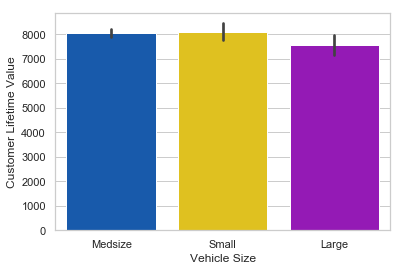

In [78]:
# Vehicle Size and CLV
sns.barplot(x="Vehicle Size",y="Customer Lifetime Value",data = df, palette = "prism")

Most of the customers are approached through Agent or Branch. However, all Web and Call Center manage to have the same effect on CLV. 

Vehicle Size Medium is insured by the most customers. Yet, it does not result in greater CLV compared to the other sizes.

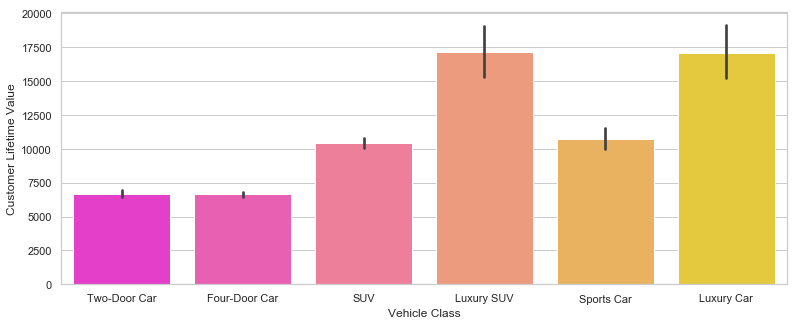

In [84]:
# Vehicle Class and CLV
dims = (13,5)
fig, ax = plt.subplots(figsize =dims)
sns.barplot(x="Vehicle Class",y="Customer Lifetime Value",data = df, palette = "spring")

Here we see a few interesting patterns. Luxury vehicles such as Luxury SUV and Luxury Car show a clear tendency to contribute more to CLV. Logically too, this makes a lot of sense. Luxury vehicles tend to be priced higher and insured at higher values too. This is a very significant result because from our univariate analysis, we saw that luxury vehicles were opted for by the lowest proportion of customers.

This category is followed by Sports Car and SUV in their contribution to CLV. Two-Door and Four-Door Car contribute at the lowest levels to CLV despite most of the customers opting for these.
This might be a significant variable.

### 6) Missing Values

In [162]:
# detecting missing values
df.isnull().sum()

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

We do not have any missing values in our dataset.

### 7) Outlier Treatment

We will check for outliers in the variables and impute them with appropriate values.

The appropriate values are arrived upon by visualising the distribution using a boxplot and observing it along with the percentile values.

###### Income

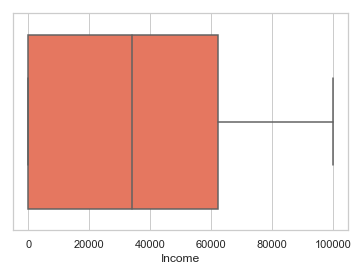

In [168]:
sns.boxplot(df['Income'], palette = "Reds") # no outliers detected

###### Monthly Premium Auto

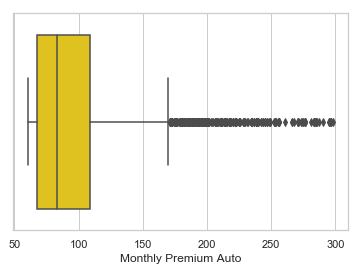

In [170]:
sns.boxplot(df['Monthly Premium Auto'], palette = "prism") # many outliers detected

In [187]:
# checking percentiles of distribution
print("Monthly Premium Auto")
print("90th :",np.percentile(df['Monthly Premium Auto'],90))
print("95th :", np.percentile(df['Monthly Premium Auto'],95))
print("97th :", np.percentile(df['Monthly Premium Auto'],97))
print("99th :", np.percentile(df['Monthly Premium Auto'],99))

Monthly Premium Auto
90th : 129.0
95th : 163.35000000000036
97th : 190.0
99th : 228.67000000000007


In [190]:
# replacing outlier with 95th %ile value
MPA_replace = np.percentile(df['Monthly Premium Auto'],95)
df.loc[df['Monthly Premium Auto']> MPA_replace,'Monthly Premium Auto'] = MPA_replace

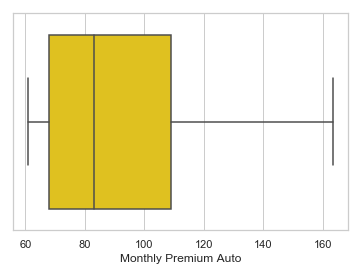

In [191]:
# Outliers removed
sns.boxplot(df['Monthly Premium Auto'], palette = "prism")

###### Months Since Last Claim

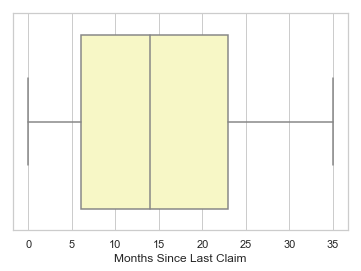

In [195]:
sns.boxplot(df['Months Since Last Claim'], palette = "Spectral") # no outliers detected

###### Months Since Policy Inception

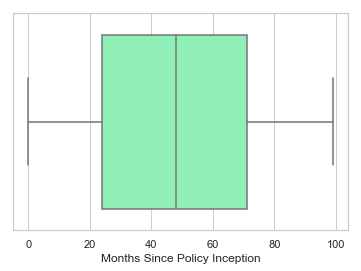

In [192]:
sns.boxplot(df['Months Since Policy Inception'], palette = "rainbow") # no outliers detected

###### Number of Open Complaints

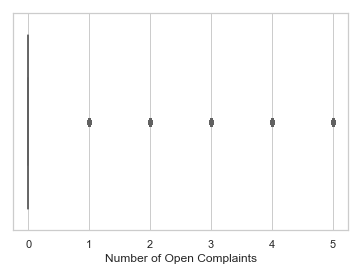

In [198]:
sns.boxplot(df['Number of Open Complaints'], palette = "Reds")

In [199]:
# checking %iles of distribution
print("Number of Open Complaints")
print("90th :",np.percentile(df['Number of Open Complaints'],90))
print("95th :", np.percentile(df['Number of Open Complaints'],95))
print("97th :", np.percentile(df['Number of Open Complaints'],97))
print("99th :", np.percentile(df['Number of Open Complaints'],99))

Number of Open Complaints
90th : 1.0
95th : 3.0
97th : 3.0
99th : 4.0


###### Number of Policies

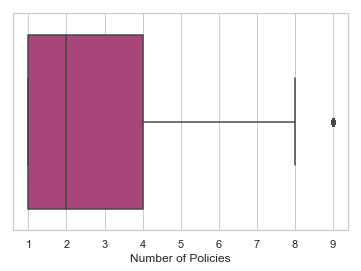

In [207]:
sns.boxplot(df['Number of Policies'], palette = "magma")

For Number of Open Complaints and Number of Policies, we see few outliers only. We will conduct the analysis with and without the outliers and compare the results.

###### Total Claim Amount

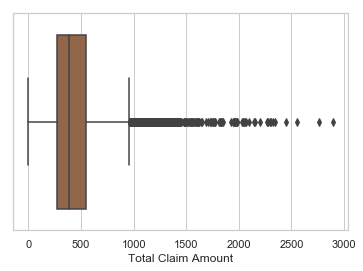

In [8]:
sns.boxplot(df['Total Claim Amount'], palette = "copper_r") # many outliers detected

In [209]:
# checking %iles of distribution
print("Total Claim Amount")
print("90th :",np.percentile(df['Total Claim Amount'],90))
print("95th :", np.percentile(df['Total Claim Amount'],95))
print("97th :", np.percentile(df['Total Claim Amount'],97))
print("99th :", np.percentile(df['Total Claim Amount'],99))

Total Claim Amount
90th : 773.4335034000001
95th : 960.115399
97th : 1138.25964758
99th : 1408.5600512700003


In [210]:
# replacing outliers with 95th %ile
TCA_replace = np.percentile(df['Total Claim Amount'],95)
df.loc[df['Total Claim Amount']> TCA_replace,'Total Claim Amount'] = TCA_replace

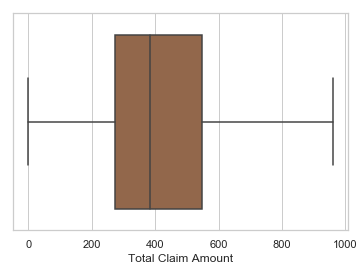

In [211]:
sns.boxplot(df['Total Claim Amount'], palette = "copper")

With this, we conclude our exploratory data analysis for this dataset. Initial exploration is important to perform before moving on to the modeling process.